# XGBoost 

XGBoost or Gradient Boosting is a machine learning algorithm that goes through cycles to iteratively add models to a set of data.
The cycle of the XGBoost algorithm begins by initializing the whole with a unique model, the predictions of which can be quite naive.

## The Process of XGBoost Algorithm:

First, we use the current set to generate predictions for each observation in the dataset. To make a prediction, we add the predictions of all the models in the set.
These predictions are used to calculate a loss function.
Then we use the loss function to fit a new model which will be added to the set. Specifically, we determine the parameters of the model so that adding this new model to the set reduces the loss.
Finally, we add the new model to the set, and …
then repeat!

## XGBoost Algorithm in Action
I’ll start by loading the training and validation data into X_train, X_valid, y_train and y_valid.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv('Datasets/Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


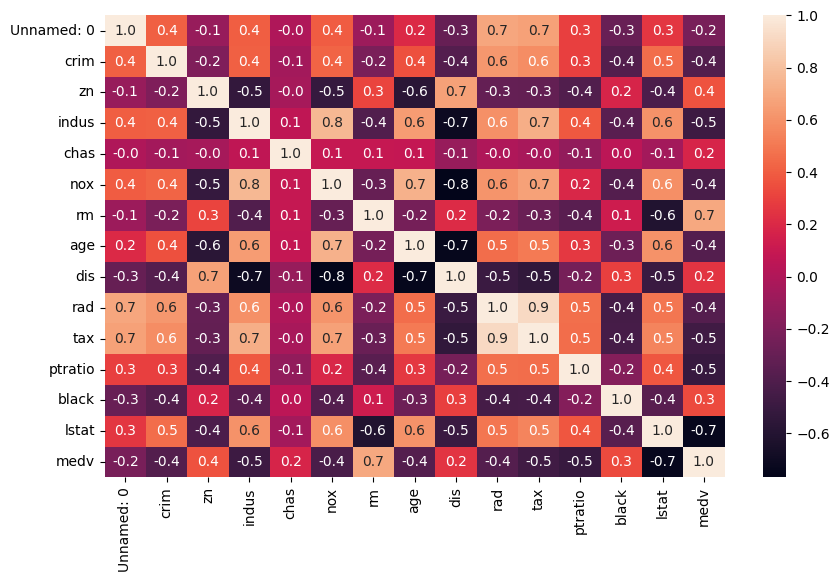

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, fmt='.1f')
plt.show()

In [3]:
# Select subset of predictors
cols_to_use = ['rm', 'tax', 'lstat', 'indus', 'zn']
X = data[cols_to_use]

# Select target
y = data['medv']

In [4]:
# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

Now, here you will learn how to use the XGBoost algorithm. Here we need to import the scikit-learn API for XGBoost (xgboost.XGBRegressor). This allows us to create and adjust a model like we would in scikit-learn. As you will see in the output, the XGBRegressor class has many adjustable parameters:

In [5]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
# Now, we need to make predictions and evaluate our model:
from sklearn.metrics import mean_absolute_error, r2_score

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))
print("R2 Score : " + str(r2_score(predictions, y_valid)))

Mean Absolute Error: 2.8947783207330176
R2 Score : 0.7080190745043402


### Parameter Tuning
XGBoost has a few features that can drastically affect the accuracy and speed of training. The first feature you need to understand are:

### n_estimators
n_estimators specifies the number of times to skip the modelling cycle described above. It is equal to the number of models we include in the set.

Too low a value results in an underfitting, leading to inaccurate predictions on training data and test data.
Too high a value results in overfitting, resulting in accurate predictions on training data, but inaccurate predictions on test data (which is important to us).
Typical the values ​​lie between 100 to 1000, although it all depends a lot on the learning_rate parameter described below. Here is the code to set the number of models in the set:

In [7]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
# Lets, make predictions and evaluate our model:
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))
print("R2 Score : " + str(r2_score(predictions, y_valid)))

Mean Absolute Error: 2.9008707827470435
R2 Score : 0.7082857167926198


### early_stopping_rounds
early_stopping_rounds provides a way to automatically find the ideal value for n_estimators. Stopping early causes the iteration of the model to stop when the validation score stops improving, even though we are not stopping hard for n_estimators. It’s a good idea to set n_estimators high and then use early_stopping_rounds to find the optimal time to stop the iteration.

Since random chance sometimes causes a single round where validation scores do not improve, you must specify a number for the number of direct deterioration turns to allow before stopping. Setting early_stopping_rounds = 5 is a reasonable choice. In this case, we stop after 5 consecutive rounds of deterioration of validation scores. Now let’s see how we can use early_stopping:

In [9]:
my_model = XGBRegressor(n_estimators=500, early_stopping_rounds=5)
my_model.fit(X_train, y_train, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [10]:
# Lets, make predictions and evaluate our model:
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))
print("R2 Score : " + str(r2_score(predictions, y_valid)))

Mean Absolute Error: 2.7955811177651713
R2 Score : 0.6735120604748837


### learning_rate
Instead of getting predictions by simply adding up the predictions of each component model, we can multiply the predictions of each model by a small number before adding them.

This means that every tree we add to the set helps us less. So we can set a high value for the n_estimators without overfitting. If we use early shutdown, the appropriate number of trees will be determined automatically. Now, let’s see how we can use learning_rate in XGBoost algorithm:

In [11]:
my_model = XGBRegressor(n_estimators=1000, early_stopping_rounds=5, learning_rate=0.05)
my_model.fit(X_train, y_train,  
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
# Lets, make predictions and evaluate our model:
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))
print("R2 Score : " + str(r2_score(predictions, y_valid)))

Mean Absolute Error: 2.925678173575814
R2 Score : 0.5924068977931465


### n_jobs
On larger datasets where execution is a consideration, you can use parallelism to build your models faster. It is common to set the n_jobs parameter equal to the number of cores on your machine. On smaller data sets, this won’t help.

The resulting model will not be better, so micro-optimizing the timing of the fit is usually just a distraction. But it’s very useful in large datasets where you would spend a lot of time waiting for the fit command. Now, let’s see how to use this parameter in the XGBoost algorithm:

In [13]:
my_model = XGBRegressor(n_estimators=500, early_stopping_rounds=5, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train,  
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
# Lets, make predictions and evaluate our model:
predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))
print("R2 Score : " + str(r2_score(predictions, y_valid)))

Mean Absolute Error: 2.925678173575814
R2 Score : 0.5924068977931465


XGBoost is a leading software library for working with standard tabular data with fine-tuning of parameters, you can train very precise models.